# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df_merged = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
df_merged.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
df_merged["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mask = df_merged.groupby(["Mouse ID", "Timepoint"]).count()["Tumor Volume (mm3)"].sort_values(ascending=False) > 1
df_merged.groupby(["Mouse ID", "Timepoint"]).count()[duplicate_mask]

/var/folders/x5/9msd5vy917xg5khrc19tx5p80000gn/T/ipykernel_4752/737063724.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_merged.groupby(["Mouse ID", "Timepoint"]).count()[duplicate_mask]


Tumor Volume (mm3)  Metastatic Sites  Drug Regimen  Sex  \
Mouse ID Timepoint                                                            
g989     0                           2                 2             2    2   
         5                           2                 2             2    2   
         10                          2                 2             2    2   
         15                          2                 2             2    2   
         20                          2                 2             2    2   

                    Age_months  Weight (g)  
Mouse ID Timepoint                          
g989     0                   2           2  
         5                   2           2  
         10                  2           2  
         15                  2           2  
         20                  2           2

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
df_merged[df_merged["Mouse ID"] == 'g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df = df_merged[df_merged["Mouse ID"] != 'g989']
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
df["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
regimen_groupby = df.groupby("Drug Regimen")

mean_tumor = regimen_groupby.mean()["Tumor Volume (mm3)"].rename("Mean Tumor Volume")
median_tumor = regimen_groupby.median()["Tumor Volume (mm3)"].rename("Median Tumor Volume")
variance_tumor = regimen_groupby.var()["Tumor Volume (mm3)"].rename("Tumor Volume Variance")
std_tumor = regimen_groupby.std()["Tumor Volume (mm3)"].rename("Tumor Volume Std. Dev")
sem_tumor = regimen_groupby.sem()["Tumor Volume (mm3)"].rename("Tumor Volume Std. Err")

# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.concat([mean_tumor, median_tumor, variance_tumor, std_tumor, sem_tumor], axis=1)
summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
regimen_groupby["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

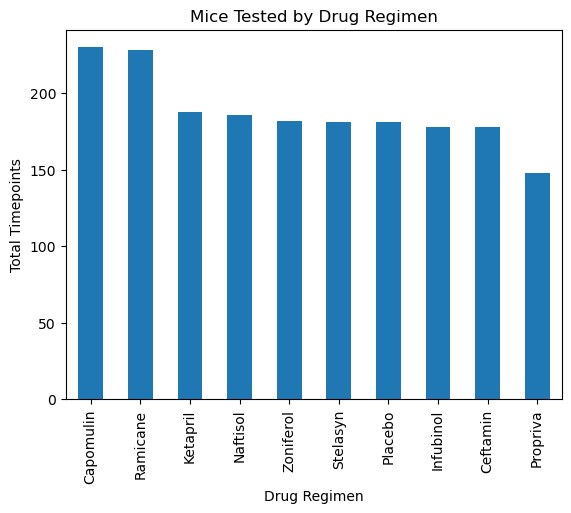

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
regimen_timepoint_df = df["Drug Regimen"].value_counts()
regimen_timepoint_df.plot(kind='bar',
                          title="Mice Tested by Drug Regimen",
                          xlabel='Drug Regimen',
                          ylabel='Total Timepoints'
                         )
plt.show()

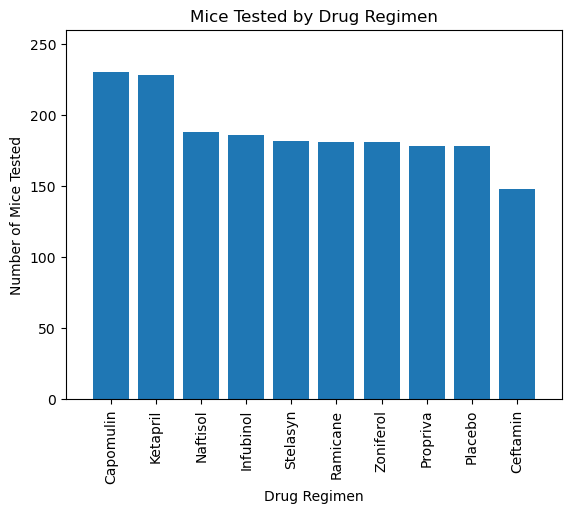

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(df["Drug Regimen"].nunique())
ticks = df["Drug Regimen"].unique()
y = df["Drug Regimen"].value_counts()
plt.bar(x_axis, y, align='center')
plt.xticks(x_axis, ticks, rotation=90)
plt.title("Mice Tested by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xlim(-1, max(x_axis) + 1)
plt.ylim(0, max(y) + 30)
plt.show()


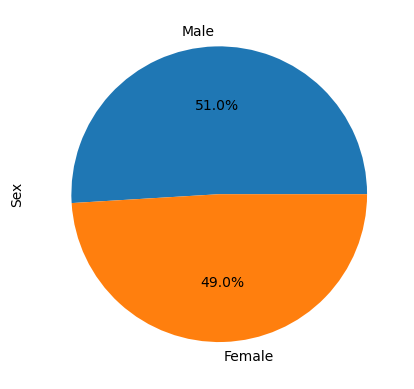

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
df["Sex"].value_counts().plot(kind='pie', autopct="%1.1f%%")
plt.show()

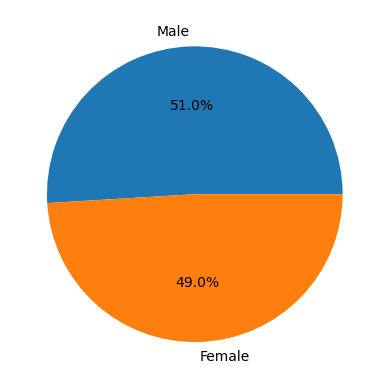

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(df['Sex'].value_counts(), labels=df['Sex'].value_counts().index, autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
# Create masks to filter data
drug_mask = df["Drug Regimen"].isin(treatments)

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = df[drug_mask].groupby("Mouse ID").max()['Timepoint'].rename("Max Timepoint")
max_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
df = pd.merge(
    df,
    max_timepoint,
    how='left',
    left_on=['Mouse ID','Timepoint'],
    right_on=['Mouse ID','Max Timepoint']
)

final_tumor_df = df.dropna()
final_tumor_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Max Timepoint
9,b128,45,38.982878,2,Capomulin,Female,9,22,45.0
214,c326,5,36.321346,0,Infubinol,Female,18,25,5.0
224,c139,45,72.226731,2,Infubinol,Male,11,28,45.0
226,v339,5,46.250112,0,Infubinol,Male,20,26,5.0
233,a577,30,57.031862,2,Infubinol,Female,6,25,30.0
...,...,...,...,...,...,...,...,...,...
1844,t565,45,34.455298,0,Capomulin,Female,20,17,45.0
1854,i557,45,47.685963,1,Capomulin,Female,1,24,45.0
1864,m957,45,33.329098,1,Capomulin,Female,3,19,45.0
1869,f966,20,30.485985,0,Capomulin,Male,16,17,20.0


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
# treatments variable defined above

# Create empty list to fill with tumor vol data (for plotting)
max_tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    mask = final_tumor_df["Drug Regimen"] == drug
    temp_df = final_tumor_df[mask]
    tumor_vol = temp_df['Tumor Volume (mm3)']
    
    # add subset 
    max_tumor_vol.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    upper_mask = tumor_vol > upper_bound
    lower_mask = tumor_vol < lower_bound
    
    outliers = tumor_vol[upper_mask | lower_mask]
    
    print(f"{drug}'s potential outliers: {outliers}'")
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)'
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)'
Infubinol's potential outliers: 214    36.321346
Name: Tumor Volume (mm3), dtype: float64'
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)'


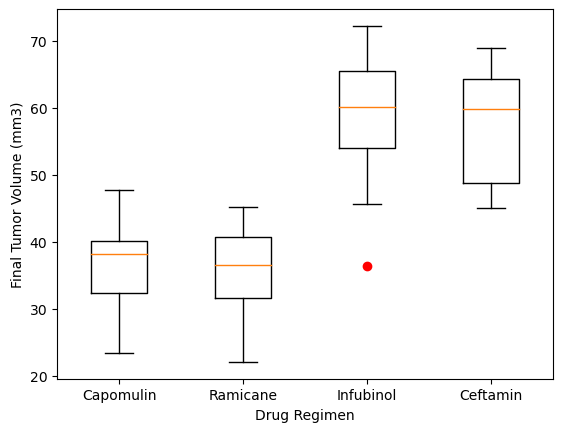

In [56]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
ax.boxplot(max_tumor_vol, labels=treatments, sym='r')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Final Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin Treatment of mouse b128')

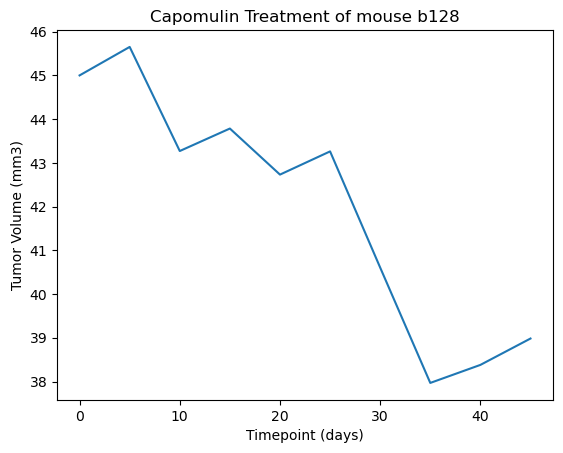

In [61]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
single_mouse_df = df[df["Mouse ID"] == 'b128'][['Tumor Volume (mm3)', 'Timepoint']]

plt.plot(single_mouse_df['Timepoint'], single_mouse_df['Tumor Volume (mm3)'])
plt.xlabel("Timepoint (days)")
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment of mouse b128')

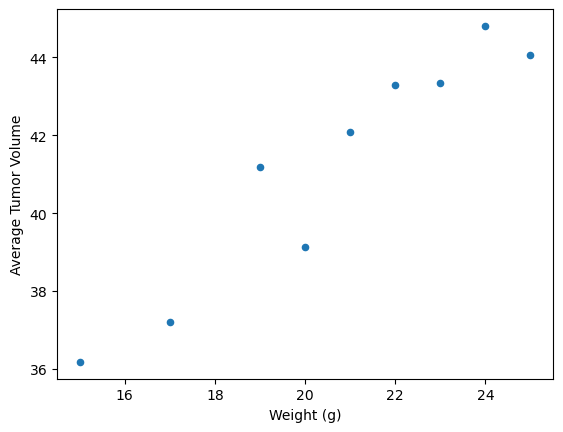

In [82]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_tumor_weight = df[df['Drug Regimen'] == 'Capomulin'].groupby('Weight (g)').mean().reset_index()

avg_tumor_weight.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', ylabel='Average Tumor Volume')

plt.show()

## Correlation and Regression

In [87]:
avg_tumor_weight.head()

,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Max Timepoint
0,15,22.500000,36.182040,0.000000,16.000000,45.000000
1,17,21.538462,37.214133,1.030769,14.769231,41.428571
2,19,22.500000,41.182391,0.700000,7.666667,45.000000
3,20,22.500000,39.141053,0.600000,23.000000,45.000000
4,21,21.666667,42.088700,0.625000,17.458333,43.000000


The correlation between both factors is 0.95


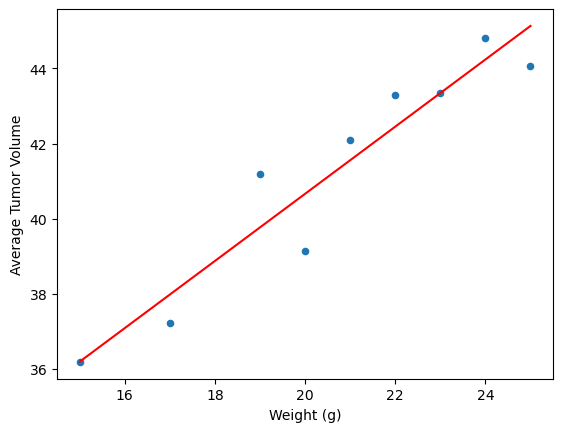

In [95]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

weight = avg_tumor_weight.iloc[:,0]
tumor = avg_tumor_weight.iloc[:,2]
correlation = st.pearsonr(weight,tumor)
print(f"The correlation between both factors is {round(correlation[0],2)}")


slope, intercept, r, p, se = st.linregress(weight, tumor)
fit = slope*weight + intercept

avg_tumor_weight.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', ylabel='Average Tumor Volume')
plt.plot(weight, fit, 'r-')